In [8]:
#!/bin/bash
!kaggle datasets download abineshpa/spam-email-dataset

Dataset URL: https://www.kaggle.com/datasets/abineshpa/spam-email-dataset
License(s): CC0-1.0
  0% 0.00/2.86M [00:00<?, ?B/s]
100% 2.86M/2.86M [00:00<00:00, 44.1MB/s]


In [9]:
!unzip /content/spam-email-dataset.zip

Archive:  /content/spam-email-dataset.zip
  inflating: emails.csv              


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('/content/emails.csv')


df['text'] = df['text'].str.lower()  # Convert to lowercase

X = df['text']
y = df['spam']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


y_pred = model.predict(X_test_tfidf)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9650837988826816
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1089
           1       0.95      0.90      0.93       343

    accuracy                           0.97      1432
   macro avg       0.96      0.94      0.95      1432
weighted avg       0.96      0.97      0.96      1432



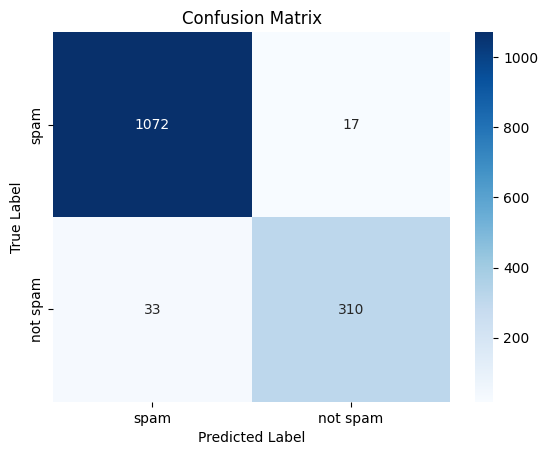

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['spam', 'not spam'], yticklabels=['spam', 'not spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()